# 선형 회귀

## Linear Regression

#### 입력값 시각화하기

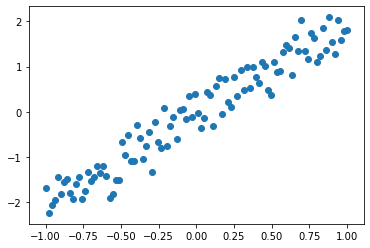

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 입력값(-1과 1사이의 100개의 값)
x_train = np.linspace(-1, 1, 100)
# 출력값
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)
plt.show()

- 점수(score)

- 비용 최소화 문제(cost minimization problem)

- 에포크(epoch)

#### 선형 회귀 문제 해결하기

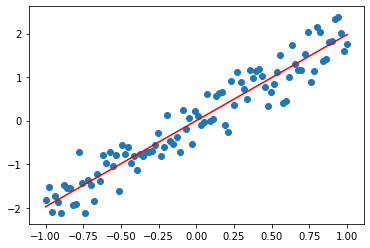

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 하이퍼파라미터(Hyperparameter) 설정
learning_rate = 0.01
training_epochs = 100

# fake data 설정
x_train = np.linspace(-1, 1, 100)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

# 입력 노드와 출력 노드를 플레이스홀더로 설정
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# y = w*X
def model(X, w):
    return tf.multiply(X, w)

# 가중치 변수 설정
w = tf.Variable(0.0, name='weights')

# 비용 함수 설정
y_model = model(X, w)
cost = tf.square(Y - y_model)

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 세션 설정 및 전체 변수 초기화
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

# 데이터셋 반복
for epoch in range(training_epochs):
    # 데이터셋 내의 각 아이템을 반봅
    for (x, y) in zip(x_train, y_train):
        # 비용 함수를 최소화하기 위해 모델 파라미터를 업데이트
        sess.run(train_op, feed_dict={X : x, Y : y})

# 최종 파라미터 값
w_val = sess.run(w)

sess.close()

# 원래 데이터 그리기
plt.scatter(x_train, y_train)
# 직선 그리기
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()